# Sección 14: Aproximación Lineal y Estimación de Errores

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, sqrt, Abs, N

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Aproximación Lineal (Linealización)

**Definición**: La aproximación lineal de una función $f(x)$ en un punto $x = a$ está dada por:
$$L(x) = f(a) + f'(a)(x - a)$$

Esta es la ecuación de la recta tangente a $f(x)$ en $x = a$.

### Implementación con visualización

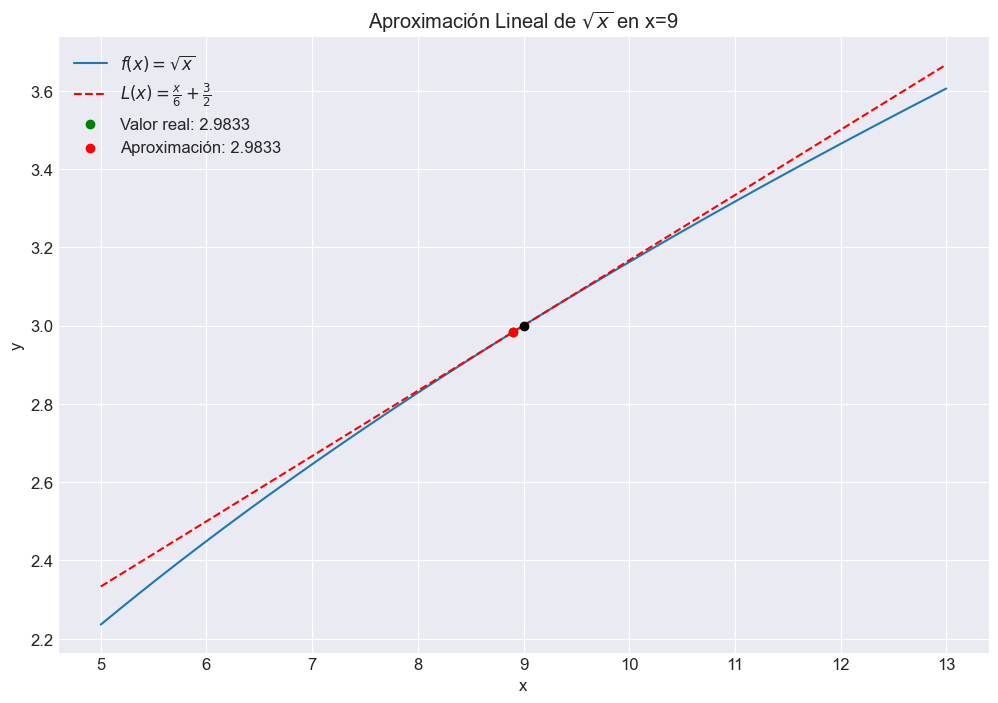

=== Aproximación Lineal ===
Función: f(x) = sqrt(x)
Punto de tangencia: a = 9
Aproximación lineal: L(x) = x/6 + 3/2

Estimación de f(8.9):
Valor real: f(8.9) = 2.983287
Aproximación: L(8.9) = 2.983333


In [4]:
def linear_approximation_demo():
    x = symbols('x')
    f = sqrt(x)  # Función de ejemplo

    # Punto de tangencia
    a = 9
    f_a = f.subs(x, a)

    # Calcular derivada y pendiente en x=a
    f_prime = diff(f, x)
    m = f_prime.subs(x, a)

    # Construir la aproximación lineal
    L = f_a + m*(x - a)

    # Convertir a funciones numéricas para graficar
    f_lamb = sp.lambdify(x, f, 'numpy')
    L_lamb = sp.lambdify(x, L, 'numpy')

    # Punto a aproximar
    x_approx = 8.9
    true_value = f_lamb(x_approx)
    approx_value = L_lamb(x_approx)

    # Crear gráfico
    x_vals = np.linspace(5, 13, 500)
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=fr'$f(x) = \sqrt{{x}}$')
    plt.plot(x_vals, L_lamb(x_vals), 'r--', label=fr'$L(x) = {sp.latex(L)}$')
    plt.scatter([a], [f_a], color='black', zorder=5) # type: ignore
    plt.scatter([x_approx], [true_value], color='green', zorder=5, label=f'Valor real: {true_value:.4f}')
    plt.scatter([x_approx], [approx_value], color='red', zorder=5, label=f'Aproximación: {approx_value:.4f}')

    plt.title(r'Aproximación Lineal de $\sqrt{x}$ en x=9')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("=== Aproximación Lineal ===")
    print(f"Función: f(x) = {f}")
    print(f"Punto de tangencia: a = {a}")
    print(f"Aproximación lineal: L(x) = {L}")
    print(f"\nEstimación de f({x_approx}):")
    print(f"Valor real: f({x_approx}) = {true_value:.6f}")
    print(f"Aproximación: L({x_approx}) = {approx_value:.6f}")

linear_approximation_demo()

## 2. Estimación de Raíces usando Aproximación Lineal

**Técnica**: Para estimar $\sqrt[n]{k}$, elegimos un valor cercano $a^n$ que conocemos y aplicamos la aproximación lineal a $f(x) = x^{1/n}$.

### Implementación para raíces cuadradas y cuartas

In [5]:
def root_approximation():
    x = symbols('x')
    
    # Ejemplo 1: Raíz cuadrada
    print("\n=== Estimación de √82 ===")
    f_sqrt = sqrt(x)
    a_sqrt = 81
    f_a_sqrt = f_sqrt.subs(x, a_sqrt)
    f_prime_sqrt = diff(f_sqrt, x)
    m_sqrt = f_prime_sqrt.subs(x, a_sqrt)
    L_sqrt = f_a_sqrt + m_sqrt*(x - a_sqrt)
    approx_sqrt = L_sqrt.subs(x, 82)
    
    print(f"Aproximación lineal: L(x) = {L_sqrt}")
    print(f"Estimación: √82 ≈ {approx_sqrt.evalf()}")
    print(f"Valor real: √82 ≈ {np.sqrt(82)}")
    
    # Ejemplo 2: Raíz cuarta
    print("\n=== Estimación de ⁴√17 ===")
    f_fourth = x**sp.Rational(1,4)
    a_fourth = 16
    f_a_fourth = f_fourth.subs(x, a_fourth)
    f_prime_fourth = diff(f_fourth, x)
    m_fourth = f_prime_fourth.subs(x, a_fourth)
    L_fourth = f_a_fourth + m_fourth*(x - a_fourth)
    approx_fourth = L_fourth.subs(x, 17)
    
    print(f"Aproximación lineal: L(x) = {L_fourth}")
    print(f"Estimación: ⁴√17 ≈ {approx_fourth.evalf()}")
    print(f"Valor real: ⁴√17 ≈ {17**0.25}")

root_approximation()


=== Estimación de √82 ===
Aproximación lineal: L(x) = x/18 + 9/2
Estimación: √82 ≈ 9.05555555555556
Valor real: √82 ≈ 9.055385138137417

=== Estimación de ⁴√17 ===
Aproximación lineal: L(x) = x/32 + 3/2
Estimación: ⁴√17 ≈ 2.03125000000000
Valor real: ⁴√17 ≈ 2.0305431848689306


## 3. Cálculo de Errores en Aproximaciones

**Definiciones**:
- **Error absoluto**: $E_A = |f(x) - L(x)|$
- **Error relativo**: $E_R = \frac{E_A}{|f(x)|}$
- **Error porcentual**: $E_P = E_R \times 100\%$

### Implementación completa con análisis de errores


=== Análisis de Errores ===
Función: f(x) = 2/sqrt(x - 1)
Punto de tangencia: a = 2
Aproximación lineal: L(x) = 4 - x

Estimación de f(1.9):
Valor real: f(1.9) = 2.108185
Aproximación: L(1.9) = 2.100000

Errores:
Error absoluto: 0.008185
Error relativo: 0.003883
Error porcentual: 0.3883%


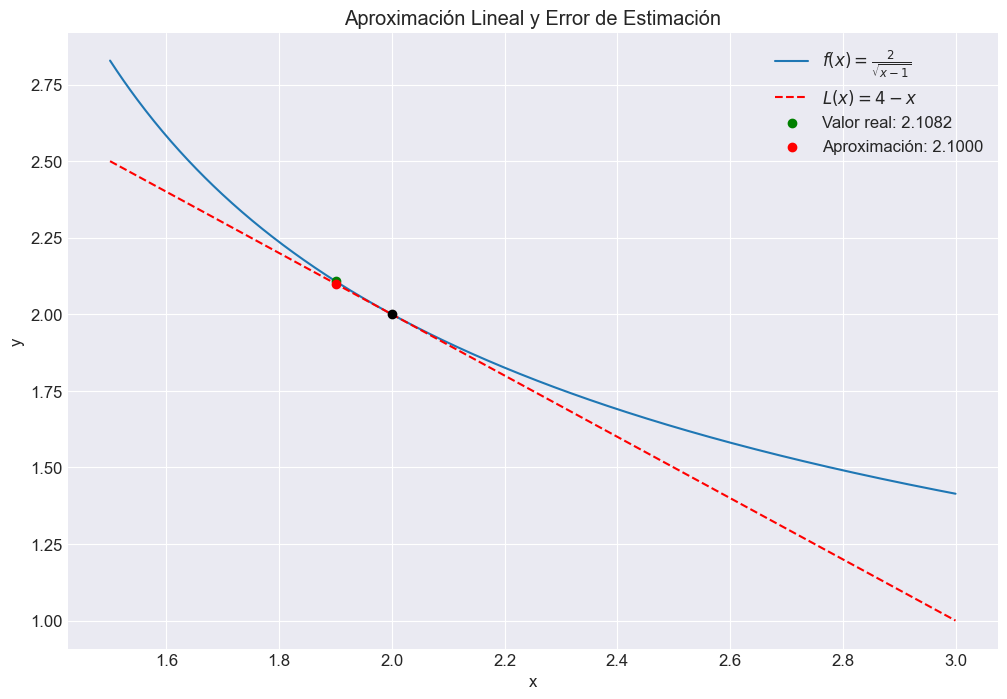

In [7]:
def error_analysis():
    x = symbols('x')
    f = 2/sqrt(x - 1)  # type: ignore
    
    # Punto de tangencia
    a = 2
    f_a = f.subs(x, a)
    
    # Calcular derivada y pendiente
    f_prime = diff(f, x)
    m = f_prime.subs(x, a)
    
    # Construir aproximación lineal
    L = f_a + m*(x - a)
    
    # Punto a aproximar
    x_approx = 1.9
    true_value = f.subs(x, x_approx).evalf()
    approx_value = L.subs(x, x_approx).evalf()
    
    # Calcular errores
    absolute_error = Abs(true_value - approx_value)
    relative_error = absolute_error / Abs(true_value) # type: ignore
    percentage_error = relative_error * 100
    
    print("\n=== Análisis de Errores ===")
    print(f"Función: f(x) = {f}")
    print(f"Punto de tangencia: a = {a}")
    print(f"Aproximación lineal: L(x) = {L.simplify()}")
    print(f"\nEstimación de f({x_approx}):")
    print(f"Valor real: f({x_approx}) = {true_value:.6f}")
    print(f"Aproximación: L({x_approx}) = {approx_value:.6f}")
    print(f"\nErrores:")
    print(f"Error absoluto: {float(absolute_error):.6f}") # type: ignore
    print(f"Error relativo: {float(relative_error):.6f}")
    print(f"Error porcentual: {float(percentage_error):.4f}%")
    
    # Visualización
    x_vals = np.linspace(1.5, 3, 500)
    f_lamb = sp.lambdify(x, f, 'numpy')
    L_lamb = sp.lambdify(x, L, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=f'$f(x) = \\frac{{2}}{{\\sqrt{{x-1}}}}$')
    plt.plot(x_vals, L_lamb(x_vals), 'r--', label=f'$L(x) = {sp.latex(L.simplify())}$')
    plt.scatter([a], [f_a], color='black', zorder=5)
    plt.scatter([x_approx], [float(true_value)], color='green', zorder=5, label=f'Valor real: {float(true_value):.4f}')
    plt.scatter([x_approx], [float(approx_value)], color='red', zorder=5, label=f'Aproximación: {float(approx_value):.4f}')
    
    plt.title('Aproximación Lineal y Error de Estimación')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

error_analysis()

## 4. Ejemplo Integrado: Estimación de √50 con Análisis de Error


=== Ejemplo Completo: Estimación de √50 ===
Función: f(x) = √x
Punto de tangencia: a = 49
Aproximación lineal: L(x) = x/14 + 7/2

Estimación de √50:
Valor real: √50 ≈ 7.07106781
Aproximación: L(50) ≈ 7.07142857

Errores:
Error absoluto: 0.00036076
Error relativo: 0.00005102
Error porcentual: 0.005102%


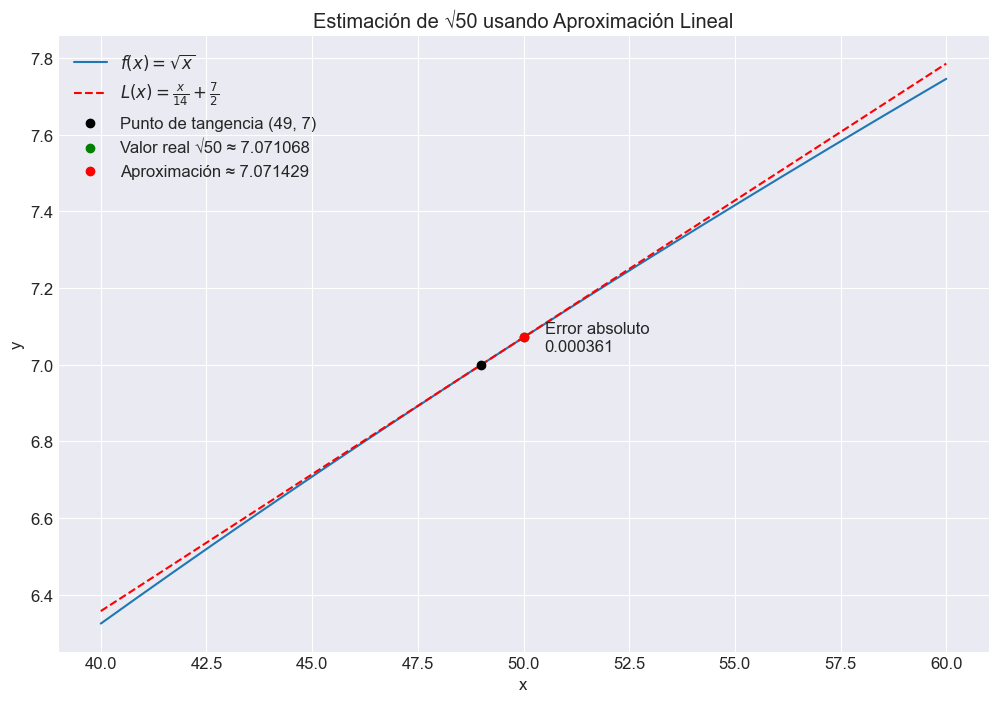

In [11]:
def complete_example():
    x = symbols('x')
    f = sqrt(x)
    
    # Punto de tangencia (cercano a 50 que conocemos)
    a = 49
    f_a = f.subs(x, a)
    
    # Calcular derivada y pendiente
    f_prime = diff(f, x)
    m = f_prime.subs(x, a)
    
    # Construir aproximación lineal
    L = f_a + m*(x - a)
    
    # Punto a aproximar
    x_approx = 50
    true_value = f.subs(x, x_approx).evalf() # type: ignore
    approx_value = L.subs(x, x_approx).evalf()
    
    # Calcular errores
    absolute_error = Abs(true_value - approx_value)
    relative_error = absolute_error / Abs(true_value) # type: ignore
    percentage_error = relative_error * 100
    
    print("\n=== Ejemplo Completo: Estimación de √50 ===")
    print(f"Función: f(x) = √x")
    print(f"Punto de tangencia: a = {a}")
    print(f"Aproximación lineal: L(x) = {L.simplify()}")
    print(f"\nEstimación de √50:")
    print(f"Valor real: √50 ≈ {float(true_value):.8f}") # type: ignore
    print(f"Aproximación: L(50) ≈ {float(approx_value):.8f}")
    print(f"\nErrores:")
    print(f"Error absoluto: {float(absolute_error):.8f}") # type: ignore
    print(f"Error relativo: {float(relative_error):.8f}")
    print(f"Error porcentual: {float(percentage_error):.6f}%")
    
    # Visualización detallada
    x_vals = np.linspace(40, 60, 500)
    f_lamb = sp.lambdify(x, f, 'numpy')
    L_lamb = sp.lambdify(x, L, 'numpy')
    
    plt.figure(figsize=(12, 8))
    plt.plot(x_vals, f_lamb(x_vals), label=r'$f(x) = \sqrt{x}$')
    plt.plot(x_vals, L_lamb(x_vals), 'r--', label=f'$L(x) = {sp.latex(L.simplify())}$')
    
    # Marcar puntos importantes
    plt.scatter([a], [f_a], color='black', zorder=5, label=f'Punto de tangencia ({a}, {f_a})') # type: ignore
    plt.scatter([x_approx], [float(true_value)], color='green', zorder=5, # type: ignore
                label=f'Valor real √50 ≈ {float(true_value):.6f}') # type: ignore
    plt.scatter([x_approx], [float(approx_value)], color='red', zorder=5, 
                label=f'Aproximación ≈ {float(approx_value):.6f}') # type: ignore
    
    # Mostrar error
    plt.plot([x_approx, x_approx], [float(true_value), float(approx_value)], 'k-', lw=2) # type: ignore
    plt.text(x_approx+0.5, (float(true_value)+float(approx_value))/2, # type: ignore
             f'Error absoluto\n{float(absolute_error):.6f}', ha='left', va='center') # type: ignore
    
    plt.title('Estimación de √50 usando Aproximación Lineal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

complete_example()

## Resumen Teórico Completo

| **Concepto**               | **Fórmula/Definición**                                                                 | **Interpretación**                                  |
|----------------------------|---------------------------------------------------------------------------------------|----------------------------------------------------|
| **Aproximación Lineal**    | $L(x) = f(a) + f'(a)(x - a)$                                                         | Recta tangente usada para aproximar valores cercanos |
| **Error Absoluto**         | $E_A = \|f(x) - L(x)\|$                                                              | Diferencia absoluta entre valor real y aproximado   |
| **Error Relativo**         | $E_R = \frac{E_A}{\|f(x)\|}$                                                         | Error en relación al tamaño del valor real          |
| **Error Porcentual**       | $E_P = E_R \times 100\%$                                                             | Error relativo expresado como porcentaje            |
| **Estimación de Raíces**   | Para $f(x) = x^{1/n}$, usar $a = k^n$ cercano al valor deseado                       | Aprovecha valores conocidos para estimar cercanos   |